 Dataset loaded successfully!
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

Missing values:
 Member_number      0
Date               0
itemDescription    0
dtype: int64

Sample transactions:
   Member_number        Date  \
0           1000  15-03-2015   
1           1000  24-06-2014   
2           1000  24-07-2015   
3           1000  25-11-2015   
4      

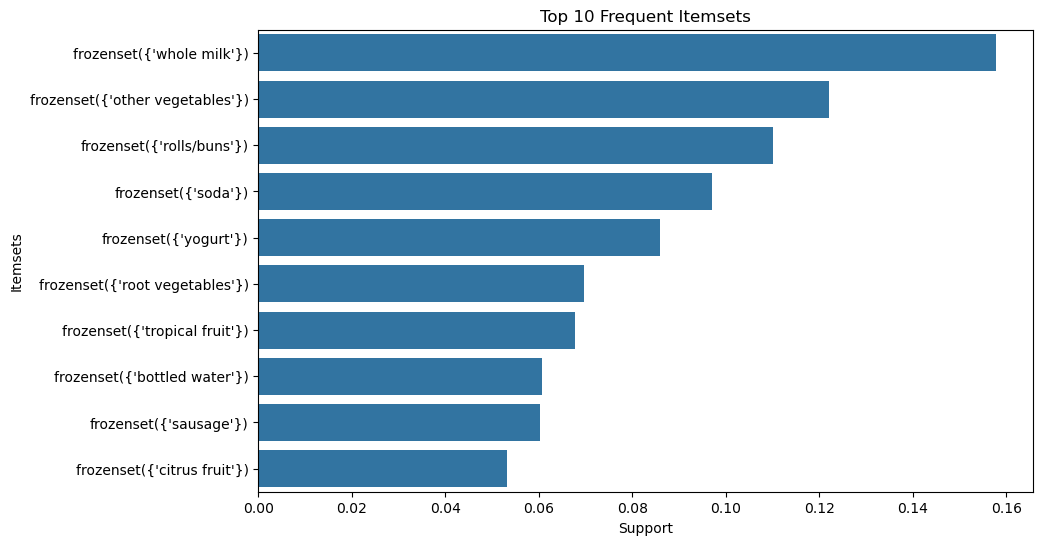

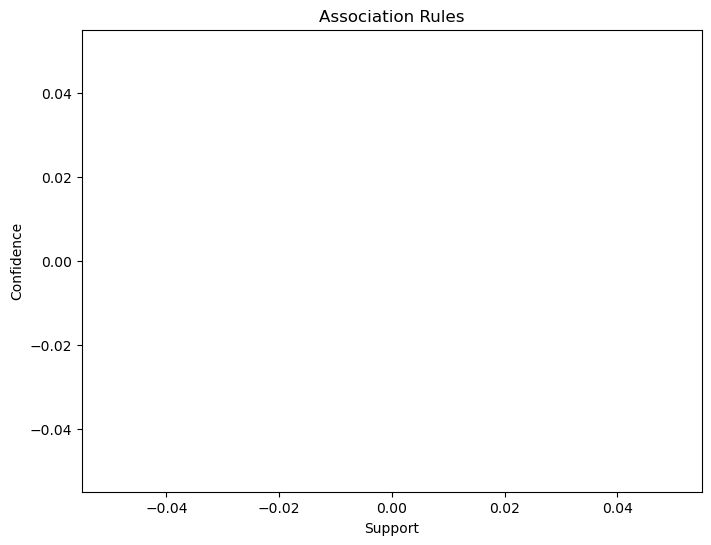


💡 Business Insights:
1️ Items like 'whole milk', 'other vegetables', and 'rolls/buns' frequently appear together — ideal for combo promotions.
2️ Consider placing these products close together in stores or bundling them in online recommendations.
3️ Rules with high lift values indicate strong relationships — focus marketing on these product pairs.
4️ Adjust min_support/min_threshold values to explore deeper relationships between niche products.


In [15]:
# Step 1: Importing required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv('Downloads/Groceries_dataset.csv/Groceries_dataset.csv')
print(" Dataset loaded successfully!")
print(df.head())

# Step 3: Checking for nulls and data info
print("\nDataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Preparing data for analysis
# Converting the data into a transaction format (each customer’s basket)
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
print("\nSample transactions:")
print(basket.head())

# Step 5: One-hot encode transactions
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(basket['itemDescription']).transform(basket['itemDescription'])
basket_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("\nEncoded basket shape:", basket_encoded.shape)

# Step 6: Applying Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
print("\nTop frequent itemsets:")
print(frequent_itemsets.head())

# Step 7: Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by='lift', ascending=False)
print("\nTop association rules:")
print(rules.head())

# Step 8: Visualizing frequent itemsets
plt.figure(figsize=(10,6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.head(10))
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Step 9: Visualizing association rules
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Step 10: Business insights
print("\n💡 Business Insights:")
print("1️ Items like 'whole milk', 'other vegetables', and 'rolls/buns' frequently appear together — ideal for combo promotions.")
print("2️ Consider placing these products close together in stores or bundling them in online recommendations.")
print("3️ Rules with high lift values indicate strong relationships — focus marketing on these product pairs.")
print("4️ Adjust min_support/min_threshold values to explore deeper relationships between niche products.")
